## Task in Hand
#### This data-set contains performance of students in an exam on 6 'subjects' (including Overall). Each student is represented by a 'studentID'.There may be duplicates in the studentID which needs to be handled at the time of data pre-processing which will be required. 
#### The task is to cluster studentsIDs into similar cluster based on their 'accuracyRate % (correct/attempted)' and 'attemptRate% (attempted/total)'. 
#### Try to derive and come up with new features from these two columns which will help in forming more robust clusters. The total number of clusters can be derived from a statistical or probabilistic based model. Also, it would be good if you come up with a metric to check the quality and validity of the clusters which you make.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from copy import deepcopy
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [2]:
# IMPORTING DATASET
data=pd.read_csv('C:/Users/Dell/0- JupyterFileCSV/Sample_test_attempt_data.csv')
data.head(6)

,accuracyRate % (correct/attempted),attemptRate% (attempted/total),studentId,subject
0,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8,Physics
1,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8,Chemistry
2,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8,English
3,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8,Logical Reasoning
4,66.666667,33.333333,5ace5f3b9fe7b01d581ddef8,Mathematics
5,6.122449,9.183673,5ace5f3b9fe7b01d581ddef8,Overall


### The idea behind proceeding into the problem statement:-
#### 1- Data preprocessing
#### 2- Checking for value of K for clustering using elbow method
#### 3- Checking quality and validity of the clusters
#### 4- Try to add new features from given columns to form more robust clusters
### Note:- We will take one subject at a time to do clustering and then consider there Overall impact

# Step- 1
## Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13806 entries, 0 to 13805
Data columns (total 4 columns):
accuracyRate % (correct/attempted)    13806 non-null float64
attemptRate% (attempted/total)        13806 non-null float64
studentId                             13806 non-null object
subject                               13806 non-null object
dtypes: float64(2), object(2)
memory usage: 323.6+ KB


In [4]:
list(zip(data.columns,data.dtypes,data.nunique()))

[('accuracyRate % (correct/attempted)', dtype('float64'), 1641),
 ('attemptRate% (attempted/total)', dtype('float64'), 605),
 ('studentId', dtype('O'), 2202),
 ('subject', dtype('O'), 6)]

#### Checking whether each student id have all 6 subjects record

In [5]:
# as we can observe that each student id is not following a similar trend of having all subject
data.groupby(['subject'])['studentId'].count()

subject
Chemistry            2299
English              2299
Logical Reasoning    2299
Mathematics          2299
Overall              2311
Physics              2299
Name: studentId, dtype: int64

In [6]:
# We will remove these studentId that contain only subject as overall
grouped = data.groupby('studentId')
grouped.filter(lambda x: x['subject'].count() < 6)

,accuracyRate % (correct/attempted),attemptRate% (attempted/total),studentId,subject
3732,75.783476,71.632653,5ace53de9fe7b01d581a33c5,Overall
3865,70.153846,66.326531,5ace52c99fe7b01d5819ea30,Overall
3908,72.727273,8.979592,5ace53699fe7b01d581a1406,Overall
3915,85.714286,17.142857,5ace568c9fe7b01d581af7eb,Overall
3922,100.000000,2.448980,5ace4dd29fe7b01d5818adf8,Overall
4253,75.132275,38.571429,5ace5b4e9fe7b01d581c8301,Overall
4260,48.051948,15.714286,5ace5fdd9fe7b01d581e1453,Overall
4279,100.000000,0.612245,5ad45b3b55ce4144f34c5e51,Overall
7010,85.436893,42.040816,5ace56969fe7b01d581afa43,Overall
8517,83.745583,57.755102,5aec7ff4555a193dd023c39a,Overall


In [7]:
data1 = grouped.filter(lambda x: x['subject'].count() > 5)

#### Now we can see that the total no. of studentId is same in each category

In [8]:
data1.groupby(['subject'])['studentId'].count()

subject
Chemistry            2299
English              2299
Logical Reasoning    2299
Mathematics          2299
Overall              2299
Physics              2299
Name: studentId, dtype: int64

#### Taking one Subject at a time 

In [9]:
Physics=data1.loc[(data1["subject"]=="Physics")]
Chemistry=data1.loc[(data1["subject"]=="Chemistry")]
English=data1.loc[(data1["subject"]=="English")]
Logical_Reasoning=data1.loc[(data1["subject"]=="Logical Reasoning")]
Mathematics=data1.loc[(data1["subject"]=="Mathematics")]
Overall=data1.loc[(data1["subject"]=="Overall")]

# Step-2
## Finding K- Value using WCSS
#### Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids is known as Within-Cluster-Sum-of-Squares (WCSS)

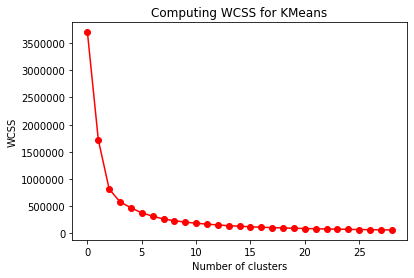

In [10]:
vals_overall = Overall.iloc[ :, 0:2].values

wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals_overall )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### Choosing the Value of K
    We often know the value of K. In this case we use the value of K as 3 and 4. Else we use the Elbow Method.

### (A)- Clustering for "Overall" category

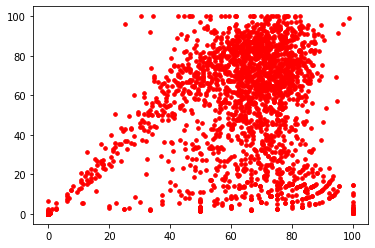

In [11]:
# Getting the values and plotting it

f1 = Overall['accuracyRate % (correct/attempted)'].values
f2 = Overall['attemptRate% (attempted/total)'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='red', s=13)

In [12]:
k = 3
# X coordinates of random centroids as '20'
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

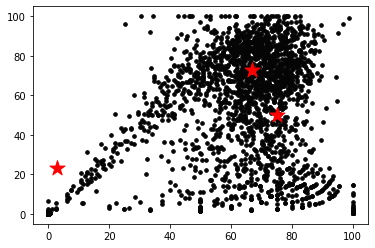

In [13]:
# Plotting along with the First random Centroids
plt.scatter(f1, f2, c='#050505', s=13)
plt.scatter(C_x, C_y, marker='*', s=250, c='r')

In [14]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print('For K=3 Initial Centroids Value:-',C) # From Initial Random value
print('For K=3 Final Centroids Value:- ',centroids) # From sci-kit learn (Final Centroids Value)

For K=3 Initial Centroids Value:- [[67. 73.]
 [75. 50.]
 [ 3. 23.]]
For K=3 Final Centroids Value:-  [[73.4947801  20.61323239]
 [66.25574033 73.61135371]
 [ 6.63055239  7.68096353]]


In [15]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')

For K=4 Final Centroids Value:-  [[-9.06884044  2.91872072  2.92698403]
 [ 3.79276222 -8.40511409  4.69530479]
 [-4.23809673  3.051034   -6.86057788]
 [-7.67184312 -0.28642638  8.48144462]]


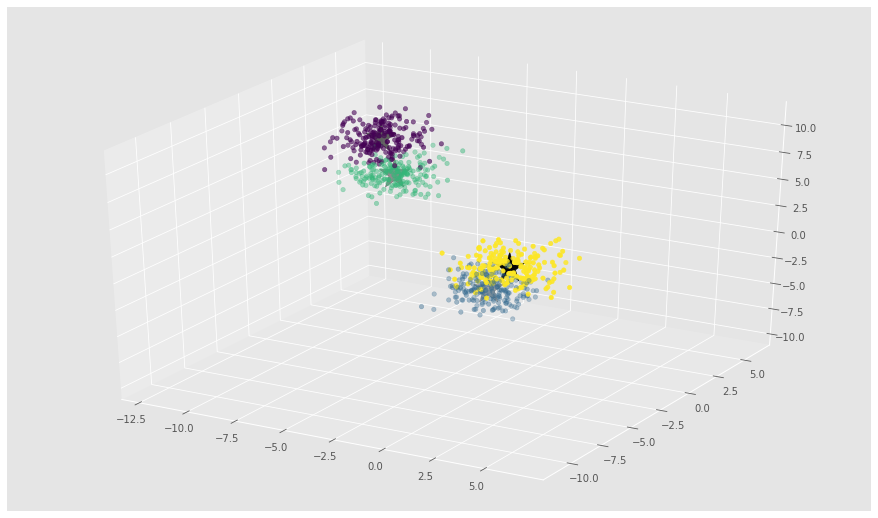

In [16]:
# Creating a sample dataset with k=4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
print('For K=4 Final Centroids Value:- ',C)

# Step-2
## Checking the quality and validity of the clusters
#### Silhouette refers to a method of interpretation and validation of consistency within clusters of data. 
#### The technique provides a succinct graphical representation of how well each object lies within its cluster.
#### The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#### The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
#### If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [17]:
k=[2,3,4,5,6,7,8]
for i in k:
    kmean_mod=KMeans(n_clusters=i)
    kmean_mod.fit(X)
    labels=kmean_mod.predict(X)
    labels=pd.DataFrame(labels)
    sc_coefficient=silhouette_score(X,labels)
    print('k--',+i,'sc_coefficient',+sc_coefficient)

k-- 2 sc_coefficient 0.5886066778832277
k-- 3 sc_coefficient 0.7401295603048824
k-- 4 sc_coefficient 0.745740398202031
k-- 5 sc_coefficient 0.6136686830768902
k-- 6 sc_coefficient 0.46608844267330296
k-- 7 sc_coefficient 0.34583585280231816
k-- 8 sc_coefficient 0.24714926263136122


### (B)- Clustering for "Physics" category

For K=3 Final Centroids Value:-  [[79.16628453 84.92396142]
 [ 0.60424194  0.78926905]
 [81.09025834 32.33766234]]
For K=4 Final Centroids Value:-  [[-3.44237561 -5.80995723 -5.35387021]
 [-5.69626387 -6.26613777  9.33086965]
 [-7.14384316  2.94848884 -2.15771044]
 [-3.53544015 -6.38068548  1.70145593]]


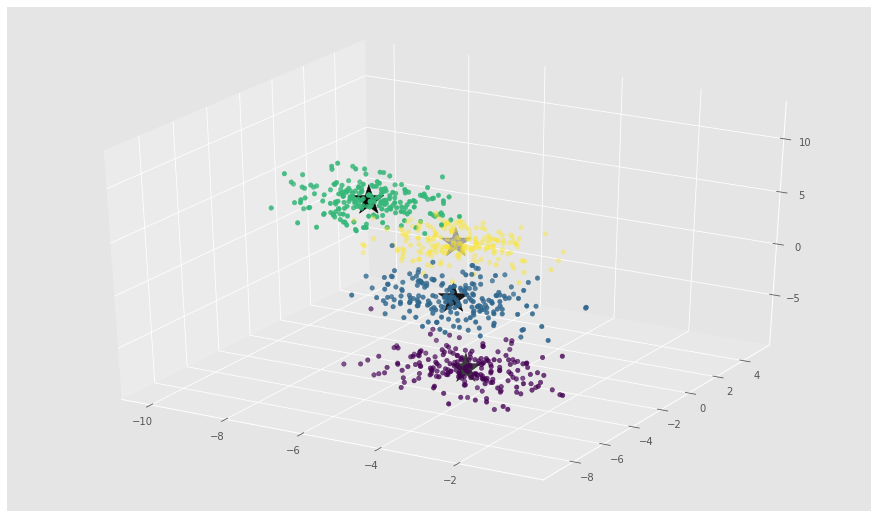

In [18]:
f1 = Physics['accuracyRate % (correct/attempted)'].values
f2 = Physics['attemptRate% (attempted/total)'].values

X = np.array(list(zip(f1, f2)))
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Creating a sample dataset with k=4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

print('For K=3 Final Centroids Value:- ',centroids)
print('For K=4 Final Centroids Value:- ',C)

In [19]:
k=[2,3,4,5,6,7,8]
for i in k:
    kmean_mod=KMeans(n_clusters=i)
    kmean_mod.fit(X)
    labels=kmean_mod.predict(X)
    labels=pd.DataFrame(labels)
    sc_coefficient=silhouette_score(X,labels)
    print('k--',+i,'sc_coefficient',+sc_coefficient)

k-- 2 sc_coefficient 0.5058089171945036
k-- 3 sc_coefficient 0.6307110417642148
k-- 4 sc_coefficient 0.7181940598048141
k-- 5 sc_coefficient 0.6020243956804837
k-- 6 sc_coefficient 0.4754609583129848
k-- 7 sc_coefficient 0.33991074281550454
k-- 8 sc_coefficient 0.22182491572742347


### (B)- Clustering for "Chemistry" category

For K=3 Final Centroids Value:-  [[62.08284421 33.50364964]
 [61.67773252 84.9932019 ]
 [ 0.45613432  0.39259928]]
For K=4 Final Centroids Value:-  [[-1.35061458  8.42937164 -7.14176801]
 [-5.22308312 -8.18226857 -8.11418123]
 [ 3.77535961 -1.23066921  0.92334319]
 [-4.29609918  1.28720095 -0.31044688]]


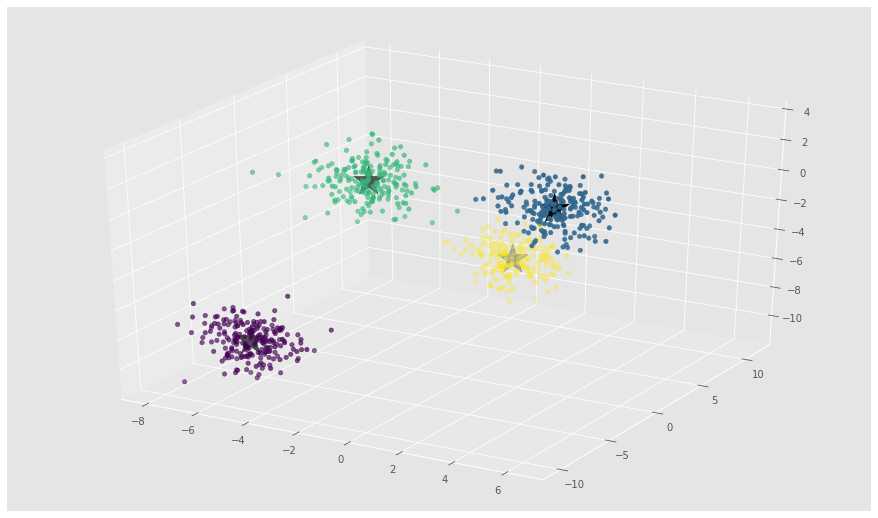

In [20]:
f1 = Chemistry['accuracyRate % (correct/attempted)'].values
f2 = Chemistry['attemptRate% (attempted/total)'].values

X = np.array(list(zip(f1, f2)))
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Creating a sample dataset with k=4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

print('For K=3 Final Centroids Value:- ',centroids)
print('For K=4 Final Centroids Value:- ',C)

In [21]:
k=[2,3,4,5,6,7,8]
for i in k:
    kmean_mod=KMeans(n_clusters=i)
    kmean_mod.fit(X)
    labels=kmean_mod.predict(X)
    labels=pd.DataFrame(labels)
    sc_coefficient=silhouette_score(X,labels)
    print('k--',+i,'sc_coefficient',+sc_coefficient)

k-- 2 sc_coefficient 0.5477961052065435
k-- 3 sc_coefficient 0.6783305823723111
k-- 4 sc_coefficient 0.7719948427602148
k-- 5 sc_coefficient 0.639502686199342
k-- 6 sc_coefficient 0.5151831738225455
k-- 7 sc_coefficient 0.3794799687577736
k-- 8 sc_coefficient 0.2273569831699472


### (C)- Clustering for "Mathematics" category

For K=3 Final Centroids Value:-  [[67.46295149 25.59249   ]
 [ 1.62160908  1.15394306]
 [62.82239364 68.79616307]]
For K=4 Final Centroids Value:-  [[ 7.56756309  5.07834002  6.93489027]
 [-6.4766587   4.75081748 -6.58735404]
 [ 7.61497543 -8.33830919  4.19029849]
 [-7.22062692  8.62056031  2.89685835]]


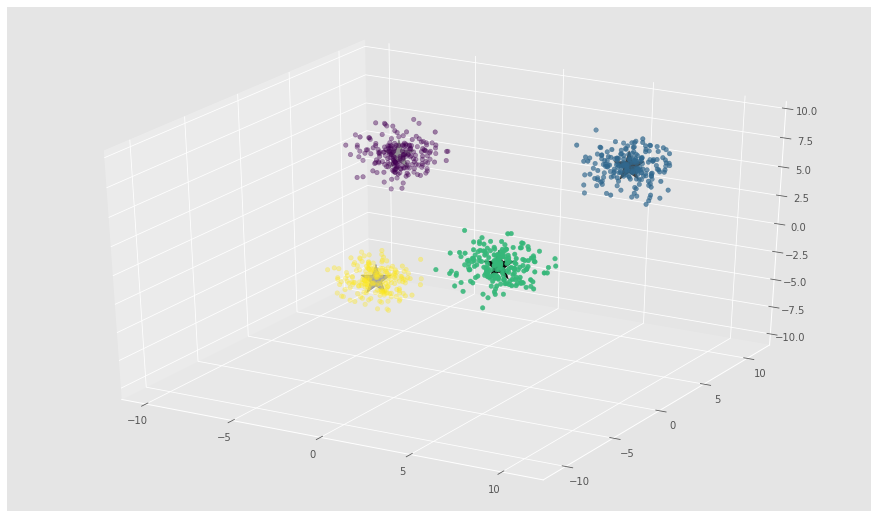

In [22]:
f1 = Mathematics['accuracyRate % (correct/attempted)'].values
f2 = Mathematics['attemptRate% (attempted/total)'].values

X = np.array(list(zip(f1, f2)))
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Creating a sample dataset with k=4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

print('For K=3 Final Centroids Value:- ',centroids)
print('For K=4 Final Centroids Value:- ',C)

In [23]:
k=[2,3,4,5,6,7,8]
for i in k:
    kmean_mod=KMeans(n_clusters=i)
    kmean_mod.fit(X)
    labels=kmean_mod.predict(X)
    labels=pd.DataFrame(labels)
    sc_coefficient=silhouette_score(X,labels)
    print('k--',+i,'sc_coefficient',+sc_coefficient)

k-- 2 sc_coefficient 0.6361263507167104
k-- 3 sc_coefficient 0.7346795845818243
k-- 4 sc_coefficient 0.8078375337093364
k-- 5 sc_coefficient 0.6588295791529157
k-- 6 sc_coefficient 0.5196930526039307
k-- 7 sc_coefficient 0.3826673945796898
k-- 8 sc_coefficient 0.2272228200728116


### (B)- Clustering for "Logical Reasoning" category

For K=3 Final Centroids Value:-  [[78.57342267 96.04690117]
 [ 0.56360709  0.62801932]
 [81.34986226 71.09504132]]
For K=4 Final Centroids Value:-  [[-8.3388372  -0.51024521  6.8924719 ]
 [ 4.09413577 -5.99075399 -0.95895739]
 [ 0.55562548  4.93318544  4.57847418]
 [-1.8305458  -8.21588892 -4.87507407]]


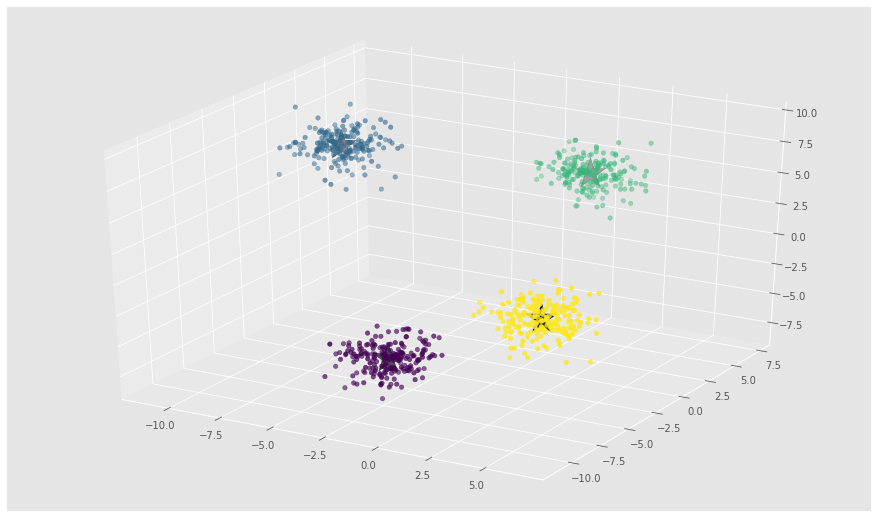

In [24]:
f1 = Logical_Reasoning['accuracyRate % (correct/attempted)'].values
f2 = Logical_Reasoning['attemptRate% (attempted/total)'].values

X = np.array(list(zip(f1, f2)))
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Creating a sample dataset with k=4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

print('For K=3 Final Centroids Value:- ',centroids)
print('For K=4 Final Centroids Value:- ',C)

In [25]:
k=[2,3,4,5,6,7,8]
for i in k:
    kmean_mod=KMeans(n_clusters=i)
    kmean_mod.fit(X)
    labels=kmean_mod.predict(X)
    labels=pd.DataFrame(labels)
    sc_coefficient=silhouette_score(X,labels)
    print('k--',+i,'sc_coefficient',+sc_coefficient)

k-- 2 sc_coefficient 0.6199868156064378
k-- 3 sc_coefficient 0.7214731030481832
k-- 4 sc_coefficient 0.7503855865283989
k-- 5 sc_coefficient 0.6103829859889983
k-- 6 sc_coefficient 0.4782259281200678
k-- 7 sc_coefficient 0.36963836621513124
k-- 8 sc_coefficient 0.2238916583196368


# Step- 4
## Add new features from given columns to form more robust clusters

We have a ratio of (correct/attempted) and (attempted/total).

If we want to derive and come up with new features from these two columns which will help in forming more robust clusters.

We can take Multiplication (attempted/total) and (correct/attempted)
i.e (correct/total). 
And Adding (attempted/total) and (correct/attempted)

Then take a ratio :-

(attempted/total) * (correct/attempted)
__________________________________________

(attempted/total) + (correct/attempted)



By get this kind of ratio we can built more accurate cluster in terms of correct answer given by Students

In [26]:
Overall['Correct/Total']=Overall['accuracyRate % (correct/attempted)'] * Overall['attemptRate% (attempted/total)'].div(100)

In [27]:
Overall['AcR+atR']=Overall['accuracyRate % (correct/attempted)'] + Overall['attemptRate% (attempted/total)']

In [28]:
Overall['Trail']=Overall['Correct/Total'] / Overall['AcR+atR']
Overall=Overall.dropna()

For K=3 Final Centroids Value:-  [[0.05820316]
 [0.36275989]
 [0.23641992]]
For K=4 Final Centroids Value:-  [[ 2.49966653  6.57619207 -0.98073965]
 [-3.32537935 -1.3111843  -1.81537606]
 [-2.22496391 -2.6442052   6.16024762]
 [-5.26627666  3.14925373 -4.5217014 ]]


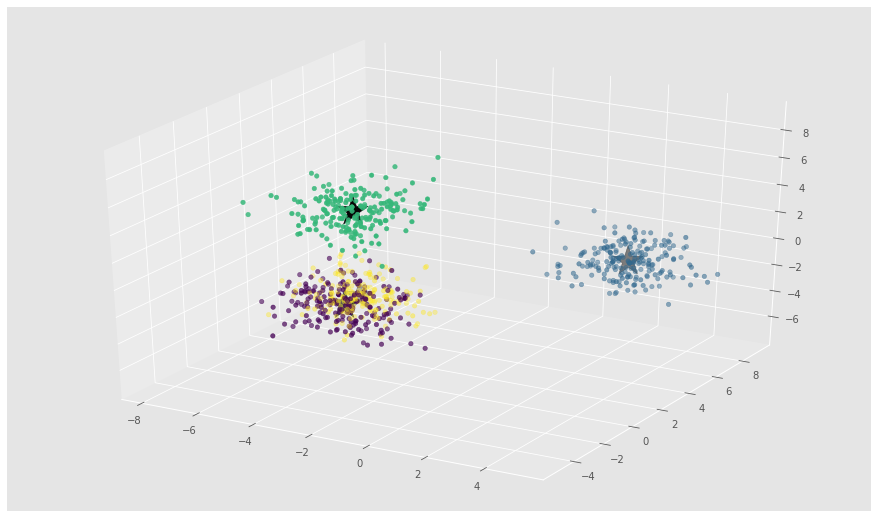

In [29]:
f1 = Overall['Trail'].values
X = np.array(list(zip(f1)))
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Creating a sample dataset with k=4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

print('For K=3 Final Centroids Value:- ',centroids)
print('For K=4 Final Centroids Value:- ',C)

In [30]:
k=[2,3,4,5,6,7,8]
for i in k:
    kmean_mod=KMeans(n_clusters=i)
    kmean_mod.fit(X)
    labels=kmean_mod.predict(X)
    labels=pd.DataFrame(labels)
    sc_coefficient=silhouette_score(X,labels)
    print('k--',+i,'sc_coefficient',+sc_coefficient)

k-- 2 sc_coefficient 0.5047721033975894
k-- 3 sc_coefficient 0.6498383192971184
k-- 4 sc_coefficient 0.6716025016467811
k-- 5 sc_coefficient 0.576379689094227
k-- 6 sc_coefficient 0.44867805748307854
k-- 7 sc_coefficient 0.32864695079648776
k-- 8 sc_coefficient 0.22933739345156112


## Conclusion 
### We built a model using K-mean Clustering and find out the best value of K to work upon. Apart from that, we tried to develop a new feature that help us to built more robust model.